<a href="https://colab.research.google.com/github/CesarSanchez89/La_Escencia_del_Cliente/blob/main/la_escencia_del_cliente_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/escencia_cliente/media prediction and its cost.csv')
dataset

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [5]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [6]:
dataset_1= dataset.rename(columns=columnas)#renombramos las columnas

In [7]:
dataset_1.categoria_alimento=dataset_1.categoria_alimento.map(categoria_alimento)
dataset_1.departamento=dataset_1.departamento.map(departamento)
dataset_1.tipo=dataset_1.tipo.map(tipo)
dataset_1.promocion=dataset_1.promocion.map(promocion)
dataset_1.escolaridad=dataset_1.escolaridad.map(escolaridad)
dataset_1.miembro=dataset_1.miembro.map(miembro)
dataset_1.ocupacion=dataset_1.ocupacion.map(ocupacion)
dataset_1.pais=dataset_1.pais.map(pais)
dataset_1.estado_civil=dataset_1.estado_civil.map(estado_civil)
dataset_1.genero=dataset_1.genero.map(genero)
dataset_1.vivienda_propia=dataset_1.vivienda_propia.map(vivienda_propia)
dataset_1.ingreso_anual=dataset_1.ingreso_anual.map(ingreso_anual)
dataset_1.comercio=dataset_1.comercio.map(comercio)
dataset_1.divulgacion=dataset_1.divulgacion.map(divulgacion)

In [8]:
dataset_1

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Especialidades,Carrusel,No comestible,2.76,1.3248,1.0,Días de ahorro,Estados Unidos,Casado,Femenino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cupón en la tienda,95.25
60424,Especialidades,Carrusel,No comestible,1.60,0.4960,1.0,Rebajando precios,Estados Unidos,Soltero,Femenino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Periódico dominical,69.42
60425,Especialidades,Carrusel,No comestible,5.52,2.5392,2.0,Descuento de fin de semana,Estados Unidos,Casado,Masculino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",67.51
60426,Especialidades,Carrusel,No comestible,8.28,2.5668,3.0,Días de venta,Canadá,Soltero,Masculino,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Periódico dominical,132.88


In [9]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

Se evidencia que hay valores nulos en la columna miembros, por lo que se proceden a eliminar esas filas.

In [10]:
dataset_1.dropna(inplace=True)

In [11]:
dataset_1.shape

(46561, 40)

#Visualizaciones

<Axes: xlabel='ingreso_anual', ylabel='Count'>

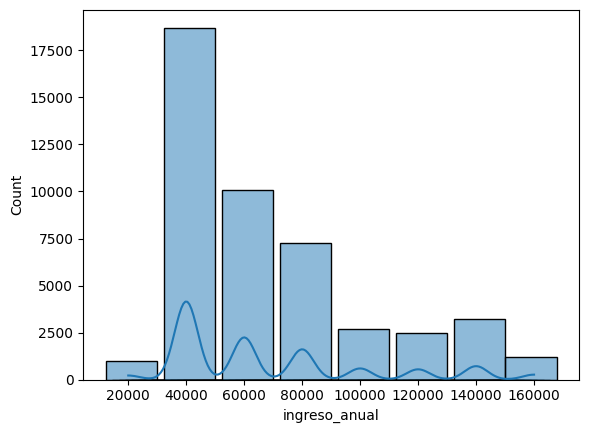

In [12]:
sns.histplot(dataset_1['ingreso_anual'], kde=True,shrink=8)

En el gráfico se puede observa que la mayor cantidad de clientes tienen ingresos anuales de 40 000 dólares

<Axes: xlabel='escolaridad', ylabel='Count'>

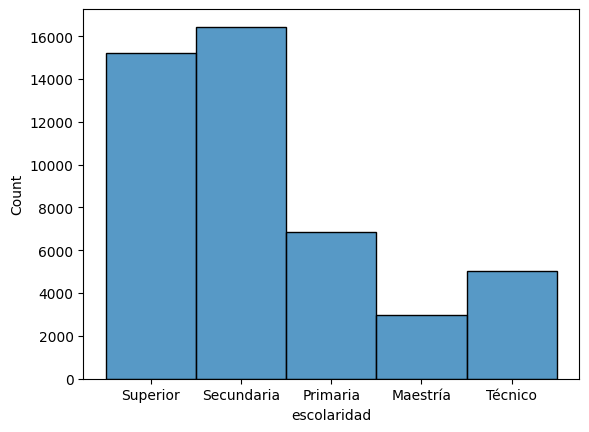

In [13]:
sns.histplot(dataset_1,x='escolaridad')

La mayor cantidad de clientes tiene educación primaria, secundaria y superior.

<Axes: xlabel='ocupacion', ylabel='Count'>

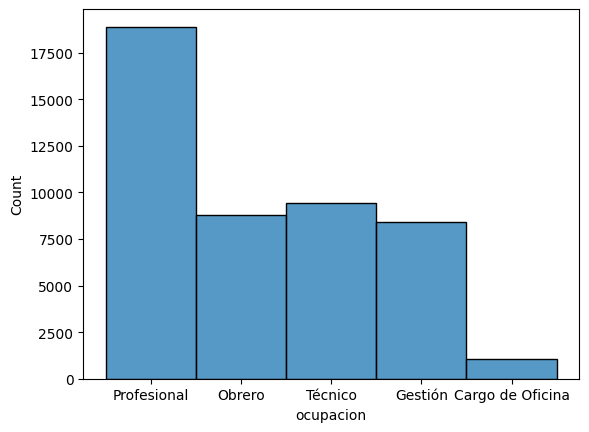

In [14]:
sns.histplot(dataset_1,x='ocupacion')

La mayoría de clientes son profesionales, técnicos y obreros.

<Axes: xlabel='genero', ylabel='Count'>

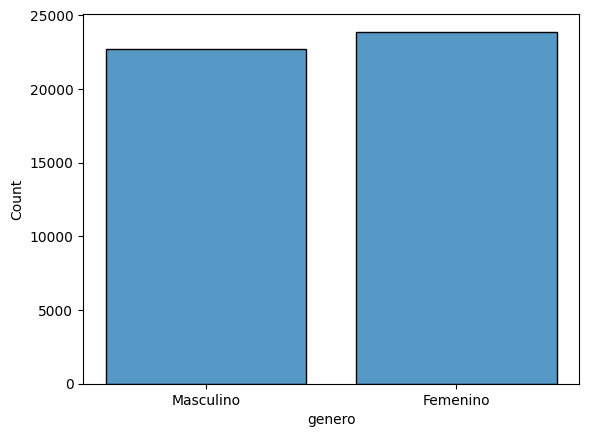

In [15]:
sns.histplot(dataset_1,x='genero',shrink=0.8)

No hay una gran diferencia de género entre los clientes.

<Axes: xlabel='Count', ylabel='categoria_alimento'>

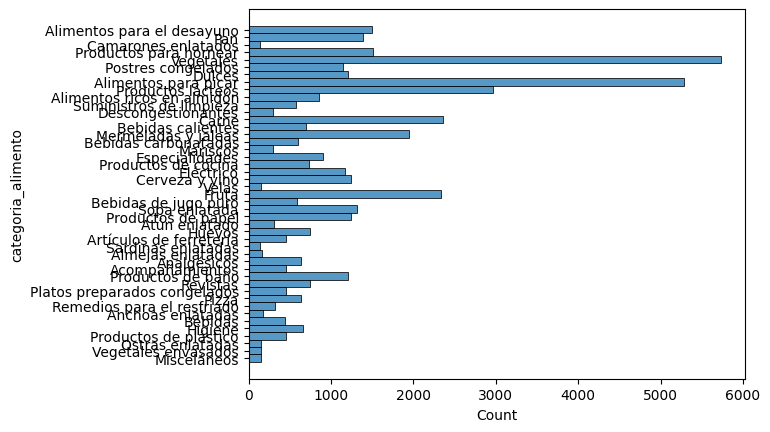

In [16]:
sns.histplot(dataset_1, y='categoria_alimento')

In [17]:
dataset_1.categoria_alimento.value_counts()

Vegetales                       5734
Alimentos para picar            5287
Productos lácteos               2961
Carne                           2357
Fruta                           2333
Mermeladas y jaleas             1951
Productos para hornear          1515
Alimentos para el desayuno      1498
Pan                             1384
Sopa enlatada                   1317
Productos de papel              1244
Cerveza y vino                  1242
Dulces                          1208
Productos de baño               1200
Eléctrico                       1169
Postres congelados              1140
Especialidades                   901
Alimentos ricos en almidón       855
Revistas                         743
Huevos                           739
Productos de cocina              730
Bebidas calientes                698
Higiene                          659
Pizza                            631
Analgésicos                      631
Bebidas carbonatadas             599
Bebidas de jugo puro             590
S

Los Vegetales y alimentos para picar son los productos más comprados por los clientes.



<Axes: xlabel='miembro', ylabel='Count'>

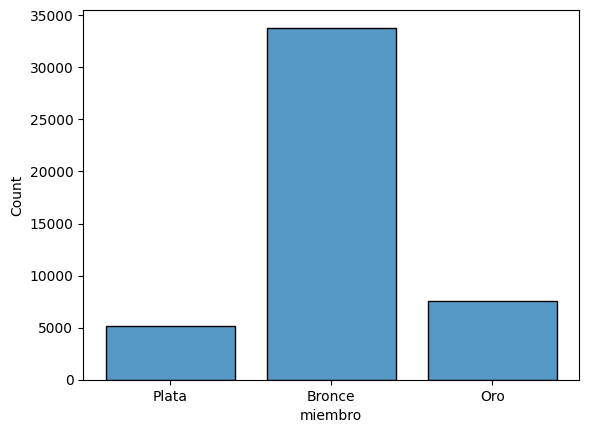

In [18]:
sns.histplot(dataset_1,x='miembro',shrink=0.8)

La mayoría de nuestros clientes son miembros Bronce

<Axes: xlabel='estado_civil', ylabel='Count'>

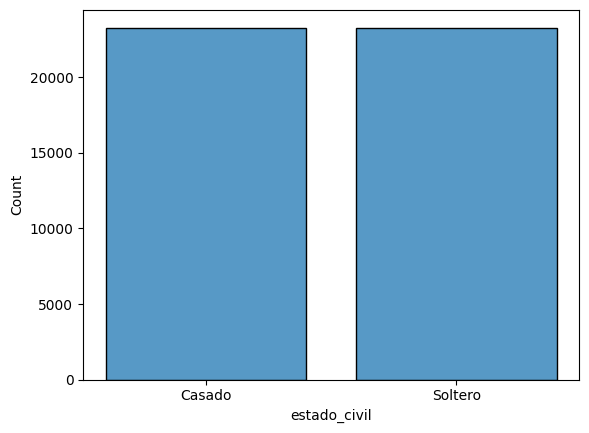

In [19]:
sns.histplot(dataset_1,x='estado_civil',shrink=0.8)

No hay mucha diferencia en el estado civil de los clientes.

<Axes: xlabel='numero_hijos', ylabel='Count'>

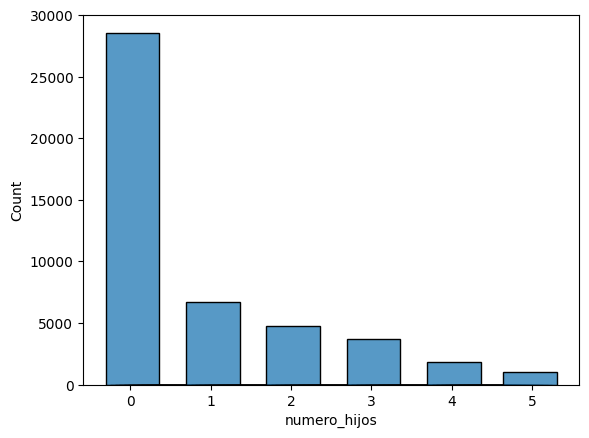

In [20]:
sns.histplot(dataset_1,x='numero_hijos',shrink=12)

La mayor cantidad de clientes no tiene hijos.

<Axes: xlabel='tipo', ylabel='Count'>

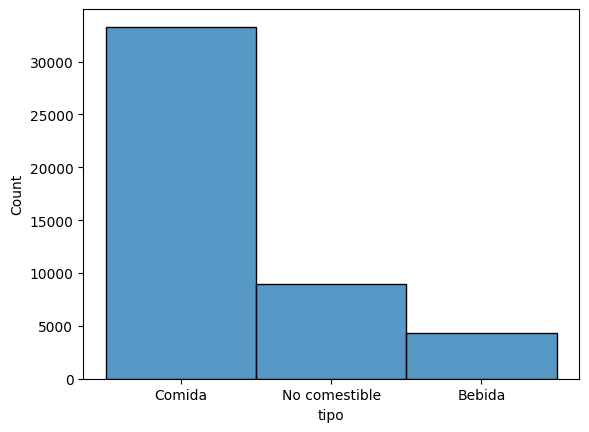

In [21]:
sns.histplot(dataset_1,x='tipo')

Hay mayor preferencia por el tipo de comida y poco en bebidas

<Axes: xlabel='Count', ylabel='promocion'>

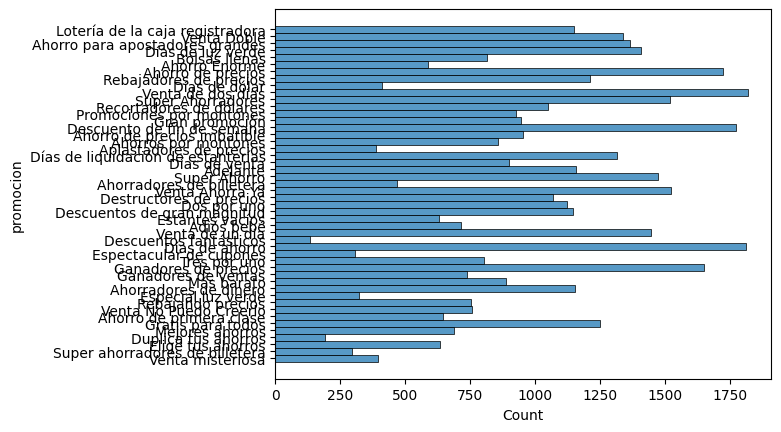

In [22]:
sns.histplot(dataset_1,y='promocion')

In [23]:
dataset_1.promocion.value_counts()

Venta de dos días                     1816
Días de ahorro                        1809
Descuento de fin de semana            1770
Ahorro de precios                     1721
Ganadores de precios                  1648
Venta Ahorra Ya                       1522
Super Ahorradores                     1519
Super Ahorro                          1472
Venta de un día                       1445
Días de luz verde                     1406
Ahorro para apostadores grandes       1362
Venta Doble                           1337
Días de liquidación de estanterías    1312
Gratis para todos                     1247
Rebajadores de precios                1209
Adelante                              1156
Ahorradores de dinero                 1151
Lotería de la caja registradora       1147
Descuentos de gran magnitud           1143
Dos por uno                           1122
Destructores de precios               1068
Recortadores de dólares               1048
Ahorro de precios imbatible            952
Gran promoc

<Axes: xlabel='Count', ylabel='divulgacion'>

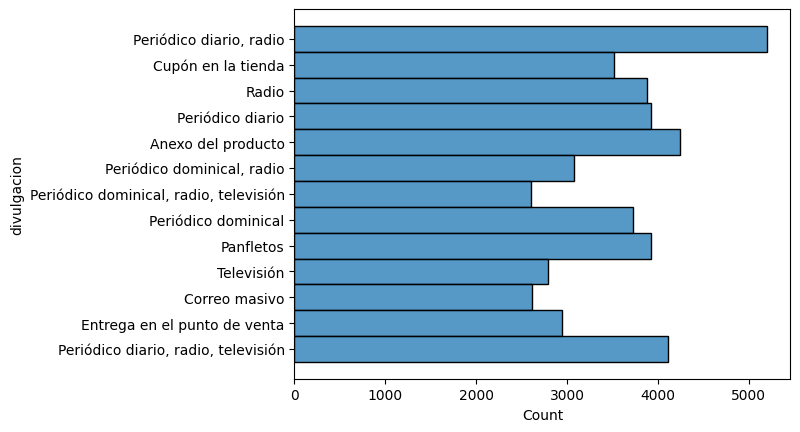

In [24]:
sns.histplot(dataset_1,y='divulgacion')

Más personas usan el periódico o la radio


<Axes: xlabel='vivienda_propia', ylabel='Count'>

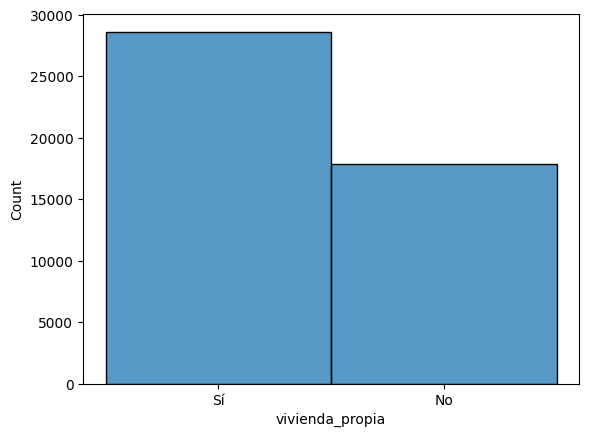

In [25]:
sns.histplot(dataset_1,x='vivienda_propia')

<Axes: xlabel='barra_de_ensaladas', ylabel='Count'>

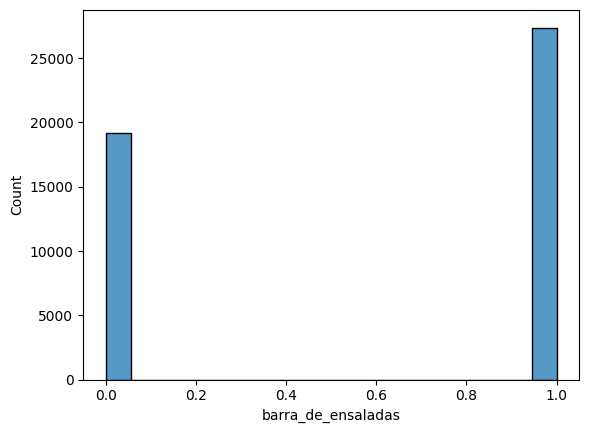

In [26]:
sns.histplot(dataset_1,x='barra_de_ensaladas')

<Axes: xlabel='bajo_en_grasa', ylabel='Count'>

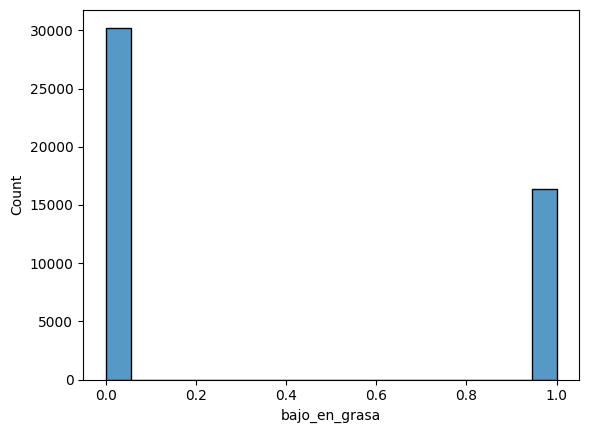

In [27]:
sns.histplot(dataset_1,x='bajo_en_grasa')

<Axes: xlabel='Count', ylabel='marca'>

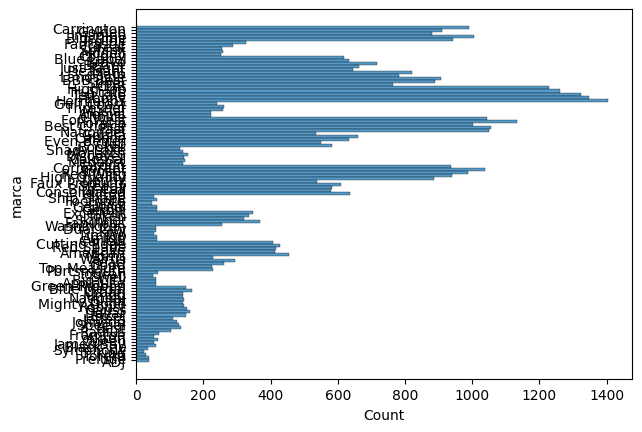

In [28]:
sns.histplot(dataset_1,y='marca')

In [29]:
dataset_1.marca.value_counts()

Hermanos     1405
Ebony        1346
Tell Tale    1323
Tri-State    1260
High Top     1227
             ... 
ADJ            40
Prelude        38
Symphony       37
Toretti        30
King           25
Name: marca, Length: 111, dtype: int64

El top de 5 marcas más compradas son Hermanos, Ebony, Tell Tale, Tri-State, High Top

<Axes: xlabel='empaque_reciclable', ylabel='Count'>

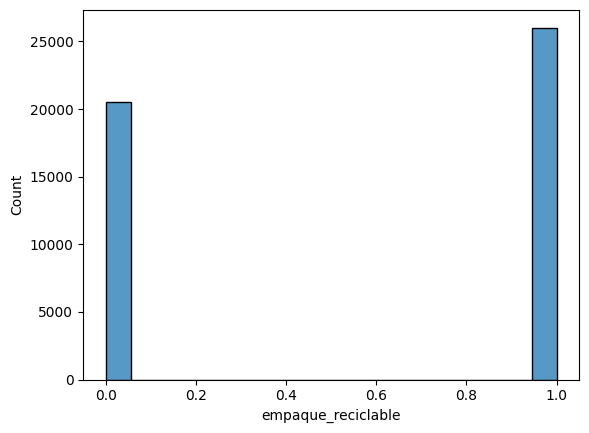

In [30]:
sns.histplot(dataset_1,x='empaque_reciclable')

<Axes: xlabel='comida_preparada', ylabel='Count'>

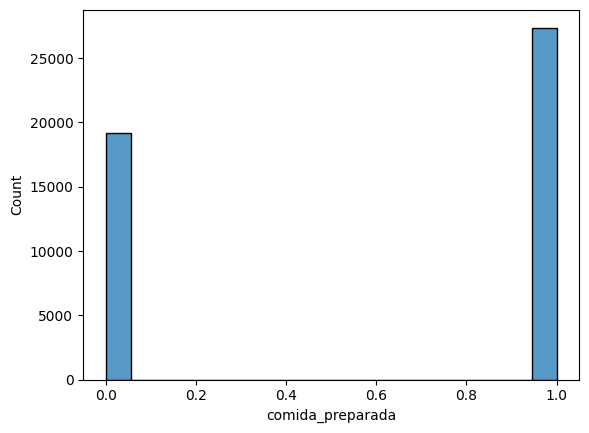

In [31]:
sns.histplot(dataset_1,x='comida_preparada')

<Axes: xlabel='cafeteria', ylabel='Count'>

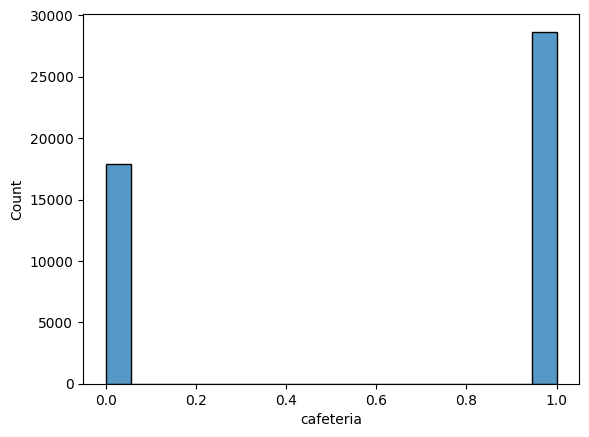

In [32]:
sns.histplot(dataset_1,x='cafeteria')

<Axes: xlabel='floristeria', ylabel='Count'>

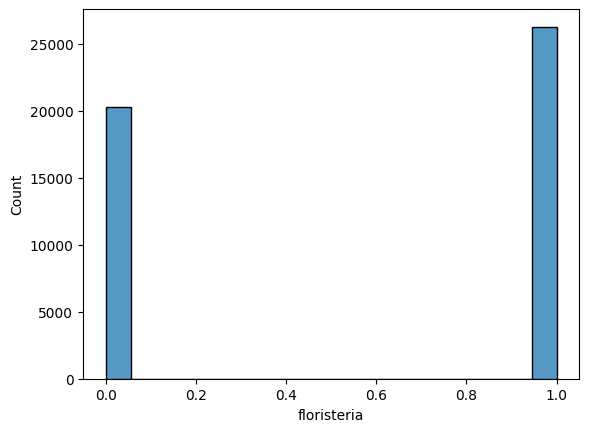

In [33]:
sns.histplot(dataset_1,x='floristeria')

<Axes: xlabel='tienda_de_videos', ylabel='Count'>

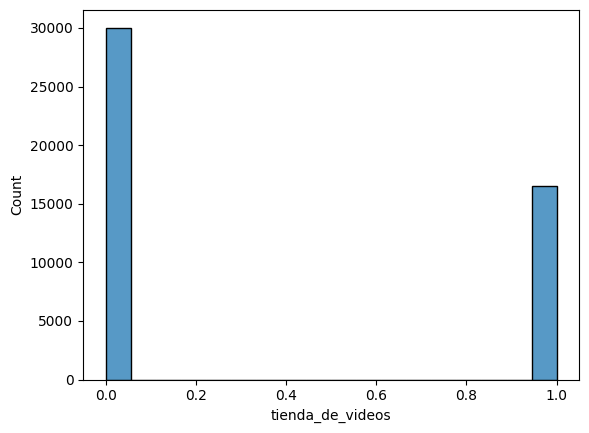

In [34]:
sns.histplot(dataset_1,x='tienda_de_videos')

<Axes: xlabel='Count', ylabel='comercio'>

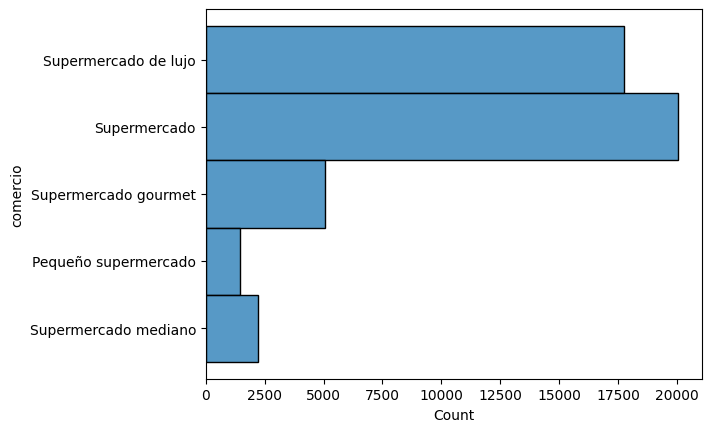

In [35]:
sns.histplot(dataset_1,y='comercio')

<Axes: xlabel='Count', ylabel='departamento'>

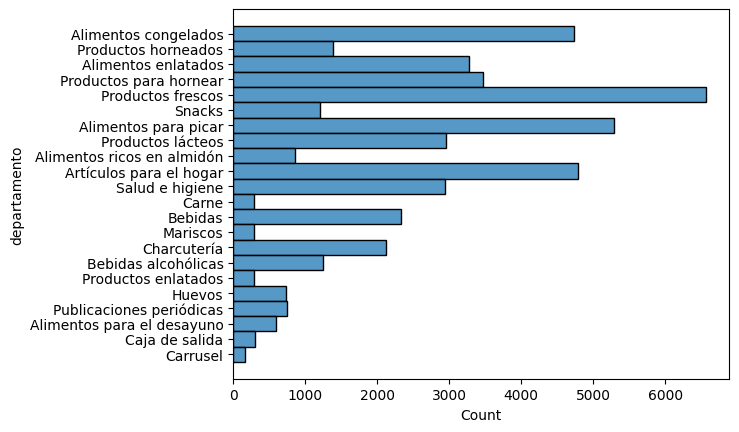

In [36]:
sns.histplot(dataset_1,y='departamento')

<ipython-input-37-cc6b9ff35d72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset_1.corr(), cmap='coolwarm')


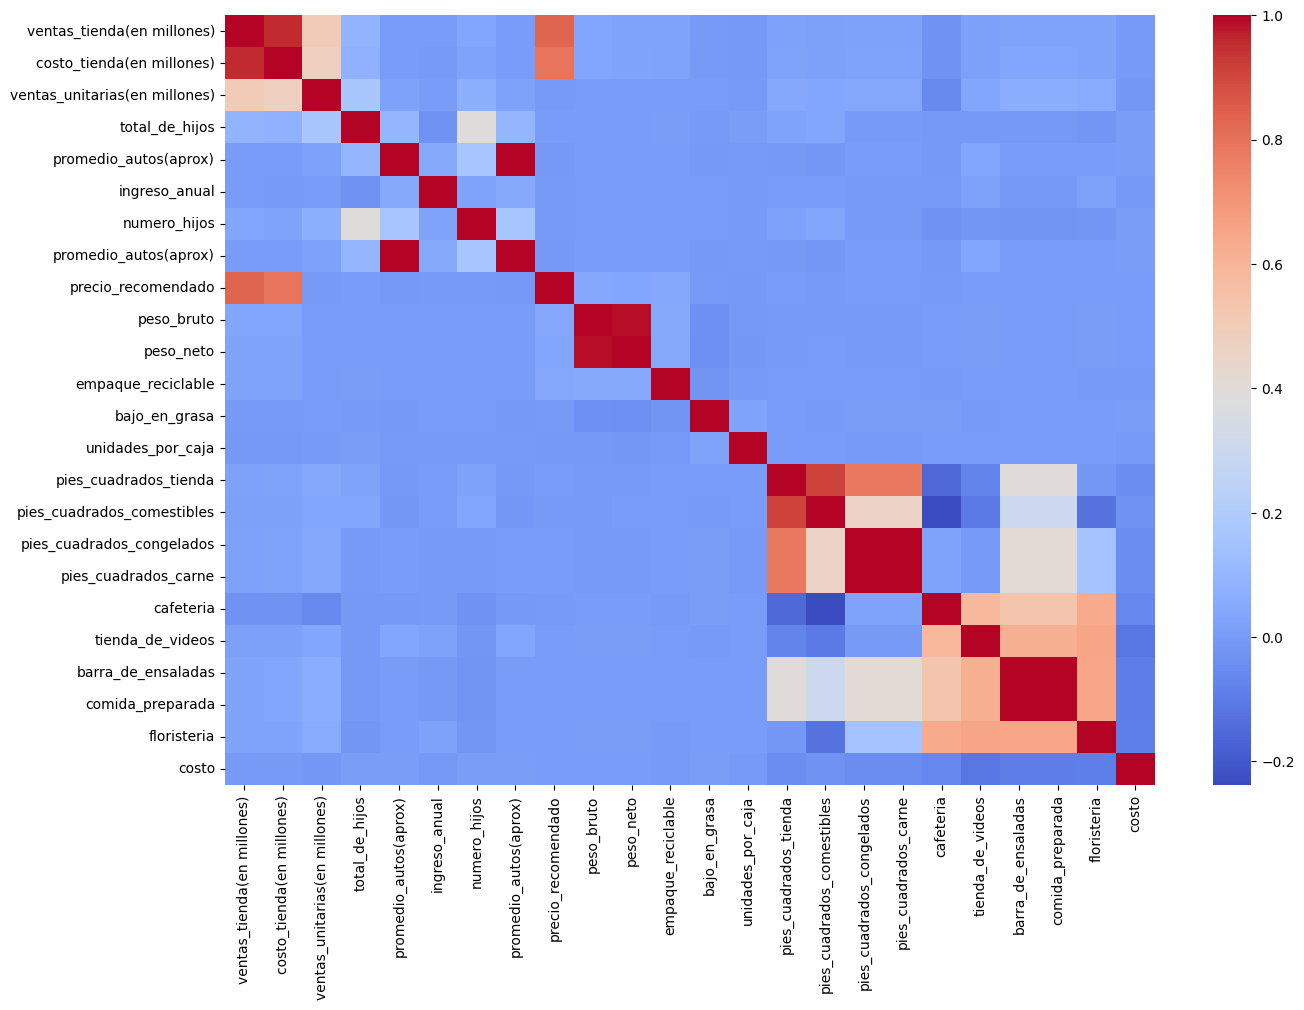

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset_1.corr(), cmap='coolwarm')
plt.show()

Se realiza un mapa de correlación, para visualizar la correlación entre las variables númericas.

In [38]:
object_cols = ['miembro','tipo'] #Elijo mis variables no numéricas y que me son representativas
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset_1[object_cols]))
OH_cols.index =dataset_1.index

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
num_cols=dataset_1[['barra_de_ensaladas','comida_preparada','floristeria']] # Elijo mis variables numéricas
df_nuevo = pd.concat([num_cols, OH_cols], axis=1) #Junto mis variables numéricas y categóricas
df_nuevo.columns = df_nuevo.columns.astype(str) #Paso todas mis columnas a string

In [40]:
scaler = StandardScaler()
scaler.fit(df_nuevo)
X_std=scaler.transform(df_nuevo)

In [41]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters=[]
for i in range(3,11):
  n_clusters.append(i)
  kmeans_model = KMeans(n_clusters=i, n_init=10, max_iter=300)
  y_pred = kmeans_model.fit_predict(X_std)
  labels = kmeans_model.labels_
  silhouette.append(metrics.silhouette_score(X_std, labels, metric='euclidean'))

  calinski_harabasz.append(metrics.calinski_harabasz_score(X_std, labels))

  davies_bouldin.append(davies_bouldin_score(X_std, labels))

metricas = pd.DataFrame([n_clusters,silhouette,calinski_harabasz,davies_bouldin]).T
metricas.rename(columns={0:'n_clusters',1:'silhouette',2:'calinski_harabasz',3:'davies_bouldin'}, inplace=True)
metricas


,n_clusters,silhouette,calinski_harabasz,davies_bouldin
0,3.0,0.406872,15355.996974,1.249860
1,4.0,0.466378,17359.543635,1.084722
2,5.0,0.517198,19117.718971,0.957496
3,6.0,0.601438,24259.498817,0.882517
4,7.0,0.643864,25089.916217,0.815129
5,8.0,0.682743,26347.919631,0.755854
6,9.0,0.708316,28035.529753,0.760785
7,10.0,0.726132,29767.784645,0.758645


De acuerdo a las métricas obtenidas se elige los 8 clusters como mejor elección.

In [42]:
random_data = np.random.rand(X_std.shape[0],X_std.shape[1])
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters=[]
for i in range(3,11):
  n_clusters.append(i)
  kmeans_model = KMeans(n_clusters=i, n_init=10, max_iter=300)
  y_pred = kmeans_model.fit_predict(random_data)
  labels = kmeans_model.labels_
  silhouette.append(metrics.silhouette_score(random_data, labels, metric='euclidean'))

  calinski_harabasz.append(metrics.calinski_harabasz_score(random_data, labels))

  davies_bouldin.append(davies_bouldin_score(random_data, labels))

metricas_random = pd.DataFrame([n_clusters,silhouette,calinski_harabasz,davies_bouldin]).T
metricas_random.rename(columns={0:'n_clusters',1:'silhouette',2:'calinski_harabasz',3:'davies_bouldin'}, inplace=True)
metricas_random

,n_clusters,silhouette,calinski_harabasz,davies_bouldin
0,3.0,0.071528,3624.463625,2.907671
1,4.0,0.073172,3301.194394,2.794576
2,5.0,0.072755,3019.740743,2.514632
3,6.0,0.073233,2821.860196,2.335199
4,7.0,0.074145,2669.406099,2.255655
5,8.0,0.075600,2541.667217,2.132349
6,9.0,0.075613,2433.381594,2.061757
7,10.0,0.076271,2340.824898,2.035350


Se verifica que X_std tiene un mayor desempeño que el random_data.

In [43]:
set=np.array_split(X_std,4)#dividimos X_std en tres partes
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_set=[]
for i in range(len(set)):
  n_set.append(i+1)
  kmeans_model = KMeans(n_clusters=8, n_init=10, max_iter=300)
  y_pred = kmeans_model.fit_predict(set[i])
  labels = kmeans_model.labels_
  silhouette.append(metrics.silhouette_score(set[i], labels, metric='euclidean'))

  calinski_harabasz.append(metrics.calinski_harabasz_score(set[i], labels))

  davies_bouldin.append(davies_bouldin_score(set[i], labels))

metricas_sets = pd.DataFrame([n_set,silhouette,calinski_harabasz,davies_bouldin]).T
metricas_sets.rename(columns={0:'n_set',1:'silhouette',2:'calinski_harabasz',3:'davies_bouldin'}, inplace=True)
metricas_sets

,n_set,silhouette,calinski_harabasz,davies_bouldin
0,1.0,0.733469,8416.165952,0.649545
1,2.0,0.657347,6463.814241,0.842743
2,3.0,0.720422,7620.260739,0.731022
3,4.0,0.678696,7021.013901,0.821411


In [44]:
dataset_1["cluster"] = kmeans_model.fit_predict(X_std)

In [45]:
def plot_porcentajes(estado, datos):
  plt.figure(figsize=(20,8))
  grafico = sns.countplot(x=estado, data=datos, orient='h')
  grafico.set_ylabel('Conteo', fontsize=17)

  sizes=[]

  for p in grafico.patches:
    height = p.get_height()
    sizes.append(height)
    grafico.text(p.get_x() + p.get_width()/1.6, height+200, f'{round(height/len(datos)*100,2)}%',
                 ha = 'center', va='bottom',fontsize=12)
    grafico.set_ylim(0,max(sizes)*1.1)

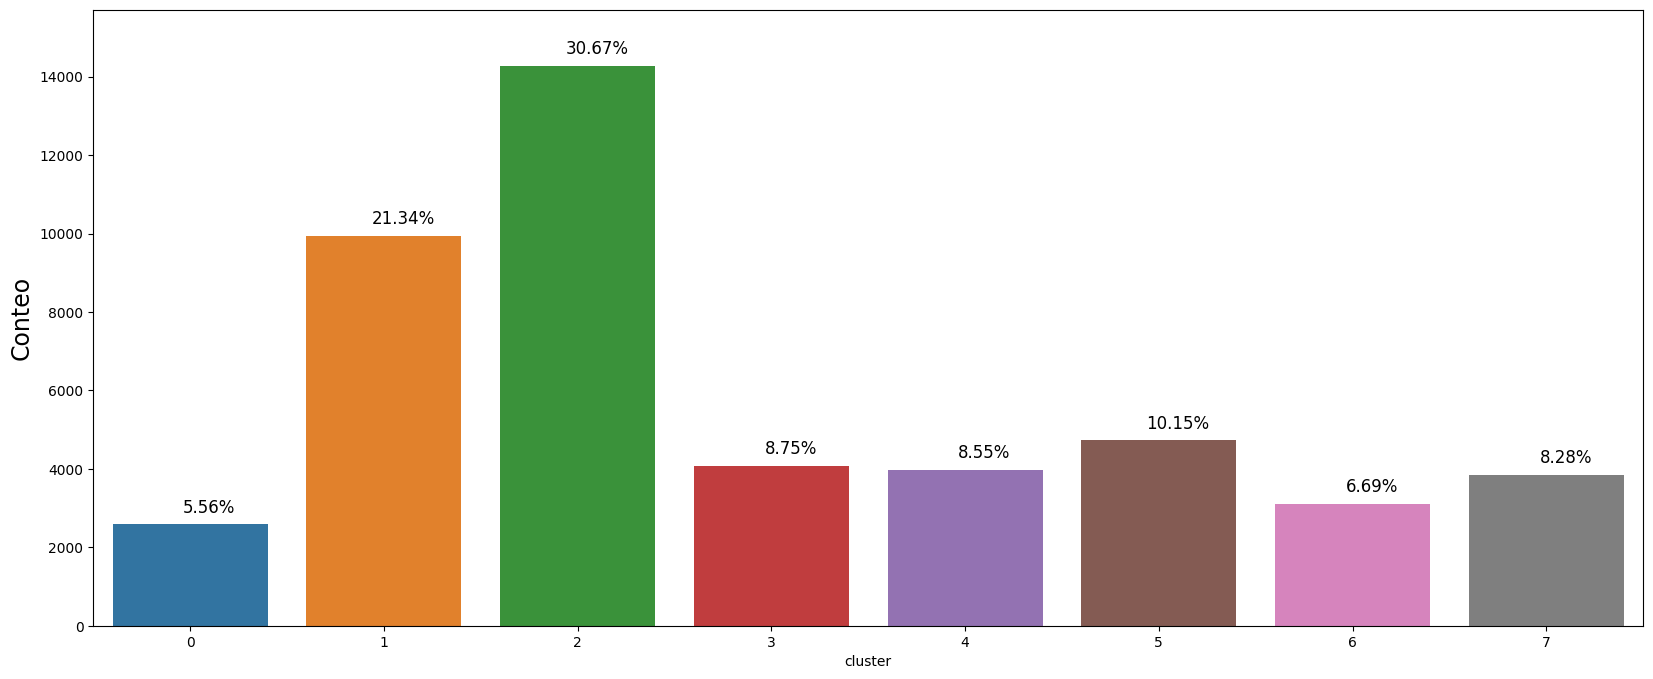

In [46]:
plot_porcentajes('cluster',dataset_1)

Observamos que el mayor número de nuestros clientes están en el cluster 1.

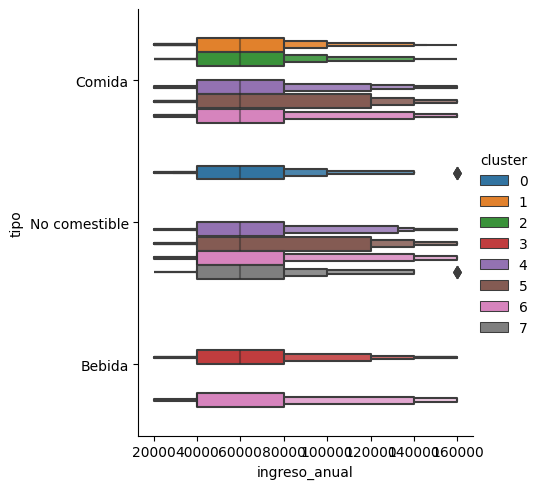

In [48]:
sns.catplot(data=dataset_1,x="ingreso_anual", y="tipo",hue='cluster',kind="boxen");

Nuestros cluster tienen preferencia entre la comida y no comestibles, pero un grupo(cluster=5) tiene inclinación a las bebidas. Se podría realizar una promoción de la bebida más solicitada con algún snack o comida preparada más pedida.

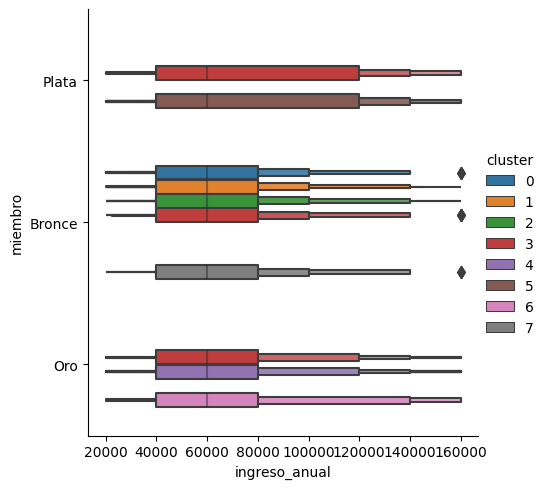

In [49]:
sns.catplot(data=dataset_1,x="ingreso_anual", y="miembro",hue='cluster',kind="boxen");

Se tiene que nuestro mayor número de clusters son Bronce con un ingreso promedio de US$ 60 000, y la mayor cantidad de clusters se encuentra en los miembros Bronce, por lo que se podría ofrecer puntos o descuentos por pasarse a los socios plata.

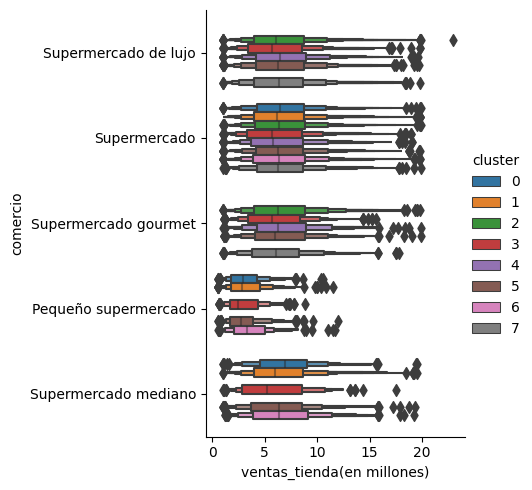

In [50]:
sns.catplot(data=dataset_1,x="ventas_tienda(en millones)", y="comercio",hue='cluster',kind="boxen");

Se observa que todos los clusters se encuentra en los supermercados, y los clusters 0,1,3,5,6 en los supermercados de lujo. Con menores ventas y en el pequeño supermercado están los clusters 0,2,4,6,7.

Los clusters 0 y 6, están los clientes que usan todos los tipos de comercio de nuestra cadena.